<a href="https://colab.research.google.com/github/SheshamJoseph/Deep-Learning-with-Tensorflow-ZTM/blob/main/03_intro_to_cv_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to convolutional Neural Network and Computer Vision with Tensorflow

Computer vision is the practice of writing  algorithms which can discover patterns in visual data.

## Get the data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-01-03 19:48:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.207, 173.194.79.207, 108.177.96.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.3MB/s    in 3.2s    

2024-01-03 19:48:26 (32.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

In [2]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [3]:
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


To visualize our images, first let's get the class names programatically

In [4]:
# Get the class names programatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #created a list of class names from the subdirectory
print(class_names)

['pizza' 'steak']


In [1]:
# Let's viksualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory
    target_folder = target_dir + target_class
    # Get a random image
    random_image = random.sample(os.listdir(target_folder), 1)
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape : {img.shape}")
    return img

Image shape : (512, 512, 3)


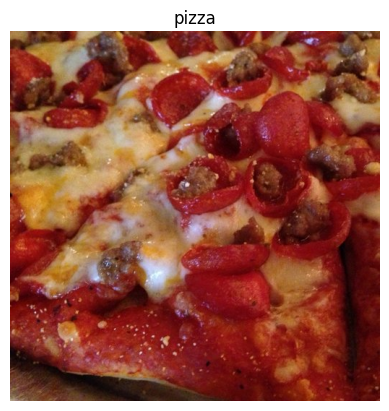

In [6]:
# View random image
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [7]:
img

array([[[166, 115,  72],
        [166, 115,  72],
        [163, 115,  69],
        ...,
        [140,  93,  49],
        [138,  91,  45],
        [129,  82,  36]],

       [[169, 118,  75],
        [169, 121,  75],
        [169, 121,  75],
        ...,
        [128,  81,  37],
        [124,  77,  33],
        [119,  72,  28]],

       [[166, 118,  72],
        [170, 122,  74],
        [171, 123,  75],
        ...,
        [118,  69,  28],
        [117,  68,  27],
        [118,  69,  28]],

       ...,

       [[163, 145, 121],
        [159, 142, 116],
        [155, 138, 112],
        ...,
        [103,  26,  20],
        [113,  36,  30],
        [124,  47,  41]],

       [[182, 166, 143],
        [177, 161, 136],
        [170, 152, 128],
        ...,
        [120,  43,  35],
        [126,  52,  43],
        [126,  52,  43]],

       [[181, 165, 142],
        [179, 163, 140],
        [175, 157, 133],
        ...,
        [129,  52,  44],
        [125,  51,  42],
        [111,  37,  28]]

In [8]:
import tensorflow as tf
img_tensor = tf.constant(img)
img_tensor

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[166, 115,  72],
        [166, 115,  72],
        [163, 115,  69],
        ...,
        [140,  93,  49],
        [138,  91,  45],
        [129,  82,  36]],

       [[169, 118,  75],
        [169, 121,  75],
        [169, 121,  75],
        ...,
        [128,  81,  37],
        [124,  77,  33],
        [119,  72,  28]],

       [[166, 118,  72],
        [170, 122,  74],
        [171, 123,  75],
        ...,
        [118,  69,  28],
        [117,  68,  27],
        [118,  69,  28]],

       ...,

       [[163, 145, 121],
        [159, 142, 116],
        [155, 138, 112],
        ...,
        [103,  26,  20],
        [113,  36,  30],
        [124,  47,  41]],

       [[182, 166, 143],
        [177, 161, 136],
        [170, 152, 128],
        ...,
        [120,  43,  35],
        [126,  52,  43],
        [126,  52,  43]],

       [[181, 165, 142],
        [179, 163, 140],
        [175, 157, 133],
        ...,
        [129,  52,  4

## Preprocessing the data

In [9]:
# Get all the pixel values between 0 and 1
img / 255

array([[[0.65098039, 0.45098039, 0.28235294],
        [0.65098039, 0.45098039, 0.28235294],
        [0.63921569, 0.45098039, 0.27058824],
        ...,
        [0.54901961, 0.36470588, 0.19215686],
        [0.54117647, 0.35686275, 0.17647059],
        [0.50588235, 0.32156863, 0.14117647]],

       [[0.6627451 , 0.4627451 , 0.29411765],
        [0.6627451 , 0.4745098 , 0.29411765],
        [0.6627451 , 0.4745098 , 0.29411765],
        ...,
        [0.50196078, 0.31764706, 0.14509804],
        [0.48627451, 0.30196078, 0.12941176],
        [0.46666667, 0.28235294, 0.10980392]],

       [[0.65098039, 0.4627451 , 0.28235294],
        [0.66666667, 0.47843137, 0.29019608],
        [0.67058824, 0.48235294, 0.29411765],
        ...,
        [0.4627451 , 0.27058824, 0.10980392],
        [0.45882353, 0.26666667, 0.10588235],
        [0.4627451 , 0.27058824, 0.10980392]],

       ...,

       [[0.63921569, 0.56862745, 0.4745098 ],
        [0.62352941, 0.55686275, 0.45490196],
        [0.60784314, 0

## An end-to-end example

For a CNN to find patterns in images we need to:
* Load the images
* Preprocess our images
* Build a CNN to find patterns
* Compile the CNN
* Fit the CNN to our training data

## Using the `tf.keras.preprocessing.ImageDataGenerator()` (deprecated)

In [10]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator # deprecated
# using tf.utils.image_dataset_from_directory() for next model

BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
# set random seed
tf.random.set_seed(42)

# preprocess data (get all pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# import data from directories and tur it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'), # filters, kernel_size
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
hist_1 = model_1.fit(train_data, epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=valid_data,
                     validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 17s 244ms/step - loss: 0.5870 - accuracy: 0.6940 - val_loss: 0.4447 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 14s 304ms/step - loss: 0.4629 - accuracy: 0.7987 - val_loss: 0.3860 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 6s 125ms/step - loss: 0.4073 - accuracy: 0.8300 - val_loss: 0.3396 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.3332 - accuracy: 0.8547 - val_loss: 0.3398 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 6s 124ms/step - loss: 0.2757 - accuracy: 0.8987 - val_loss: 0.3335 - val_accuracy: 0.8620


In [11]:
# Model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Using the `tf.keras.utils.image_dataset_from_directory()`

In [12]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [13]:
# Using the tf.keras.image_dataset_from_directory()
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    label_mode='binary',
    seed=42,
    # class_names=class_names.all(),
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)


Found 1500 files belonging to 2 classes.


In [14]:
valid_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir,
    label_mode='binary',
    seed=42,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 500 files belonging to 2 classes.


In [15]:
class_names = train_dataset.class_names

In [16]:
class_names

['pizza', 'steak']

### Configuring dataset for performance
Here we make sure to use buffered prefetching (storing data in  the cache before the processor uses it) so as to yield data from disk without having I/O blocking.

There are two wys to do this:
* `Dataset.cache`: keeps images in memory after they're loaded off disk durin first epoch
* `Dataset.prefetch`: over;aps data preprocessing and model execution while training

Since the number of elements to prefetch should be equal to (or possibly greater than) the number of batches consumed by a single training step, we will use `tf.data.AUTOTUNE` to prompt the tf.data runtime to tune this value dynamically at runtime


In [17]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
valid_dataset = valid_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
# Now to train a model
tf.random.set_seed(42)

# using TinyVGG's structure
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255), # to standardize RGB values in to [0, 1] range
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# fit the model
hist_2 = model_2.fit(train_dataset,
                     validation_data=valid_dataset,
                     epochs=10,
                     steps_per_epoch=len(train_dataset),
                     validation_steps=len(valid_dataset))

Epoch 1/10
47/47 [==============================] - 6s 81ms/step - loss: 0.7018 - accuracy: 0.4887 - val_loss: 0.6893 - val_accuracy: 0.6160
Epoch 2/10
47/47 [==============================] - 2s 34ms/step - loss: 0.6099 - accuracy: 0.7040 - val_loss: 0.4553 - val_accuracy: 0.8300
Epoch 3/10
47/47 [==============================] - 2s 33ms/step - loss: 0.4631 - accuracy: 0.7887 - val_loss: 0.4063 - val_accuracy: 0.8440
Epoch 4/10
47/47 [==============================] - 2s 33ms/step - loss: 0.4203 - accuracy: 0.8133 - val_loss: 0.4586 - val_accuracy: 0.7880
Epoch 5/10
47/47 [==============================] - 2s 33ms/step - loss: 0.3923 - accuracy: 0.8340 - val_loss: 0.4006 - val_accuracy: 0.8340
Epoch 6/10
47/47 [==============================] - 2s 33ms/step - loss: 0.3326 - accuracy: 0.8627 - val_loss: 0.5231 - val_accuracy: 0.7380
Epoch 7/10
47/47 [==============================] - 2s 33ms/step - loss: 0.2656 - accuracy: 0.9000 - val_loss: 0.5834 - val_accuracy: 0.7380
Epoch 8/10
47

## Using the same model on a different dataset

Let's replicate the model we've built in the previous cell to see if it works with our image data

The model we're building is from the Tensorflow playground

In [19]:
#   set random seed
tf.random.set_seed(42)

# create the tensorflow playground replica
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# fit the model
hist_3 = model_3.fit(train_dataset, epochs=5,
                     steps_per_epoch=len(train_dataset),
                     validation_data=valid_dataset,
                     validation_steps=len(valid_dataset))

Epoch 1/5
47/47 [==============================] - 2s 13ms/step - loss: 142.7140 - accuracy: 0.5580 - val_loss: 0.6918 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 1s 11ms/step - loss: 0.6811 - accuracy: 0.5173 - val_loss: 0.9299 - val_accuracy: 0.5360
Epoch 3/5
47/47 [==============================] - 1s 11ms/step - loss: 0.6817 - accuracy: 0.5160 - val_loss: 0.6918 - val_accuracy: 0.5020
Epoch 4/5
47/47 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 1s 11ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 602116    
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [22]:
#  Improving our model_3
tf.random.set_seed(42)

# create model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
hist_4 = model_4.fit(train_dataset, epochs=10,
                     validation_data=valid_dataset,
                     steps_per_epoch=len(train_dataset),
                     validation_steps=len(valid_dataset))

Epoch 1/10
47/47 [==============================] - 2s 18ms/step - loss: 972.1604 - accuracy: 0.5827 - val_loss: 77.2760 - val_accuracy: 0.7720
Epoch 2/10
47/47 [==============================] - 1s 26ms/step - loss: 172.5668 - accuracy: 0.6633 - val_loss: 135.5768 - val_accuracy: 0.5760
Epoch 3/10
47/47 [==============================] - 2s 32ms/step - loss: 125.0379 - accuracy: 0.6920 - val_loss: 210.2092 - val_accuracy: 0.5300
Epoch 4/10
47/47 [==============================] - 1s 15ms/step - loss: 127.7337 - accuracy: 0.6840 - val_loss: 150.0410 - val_accuracy: 0.6400
Epoch 5/10
47/47 [==============================] - 1s 16ms/step - loss: 134.9028 - accuracy: 0.6780 - val_loss: 59.1363 - val_accuracy: 0.7400
Epoch 6/10
47/47 [==============================] - 1s 15ms/step - loss: 89.4099 - accuracy: 0.7167 - val_loss: 157.3903 - val_accuracy: 0.5600
Epoch 7/10
47/47 [==============================] - 1s 16ms/step - loss: 96.3566 - accuracy: 0.7020 - val_loss: 25.0648 - val_accurac

In [23]:
model_4.evaluate(valid_dataset)

16/16 [==============================] - 0s 8ms/step - loss: 20.7975 - accuracy: 0.8020


[20.797496795654297, 0.8019999861717224]

In [24]:
model_2.evaluate(valid_dataset)

16/16 [==============================] - 0s 12ms/step - loss: 0.9111 - accuracy: 0.7660


[0.9110854864120483, 0.765999972820282]

In [25]:
model_1.evaluate(valid_dataset)

16/16 [==============================] - 2s 17ms/step - loss: 2.8382 - accuracy: 0.8100


[2.8382339477539062, 0.8100000023841858]

## Bnary Classification : Let's break it down

1. Become one with the data(Visualize)
2. Preprocess the data(here we scaled/normalized)
3. Create a model(start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model(try to beat baseline)
7. Repeat until satisfied

### 1. Visualize

Image shape : (384, 512, 3)
Image shape : (512, 512, 3)


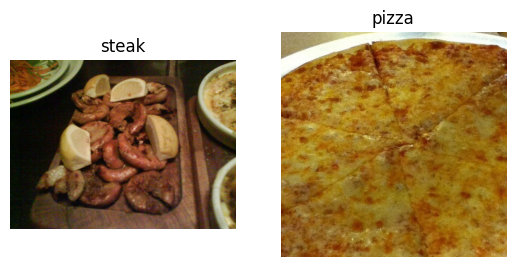

In [26]:
plt.figure()
plt.subplot(1, 2, 1)
steak_image = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_image = view_random_image('pizza_steak/train/', 'pizza')

### Preprocess our data

In [27]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Next is to turn our data into **batches**(A subset of the data). This is done because:
1. 10,000(or more) images will not fit in our computer's processor
2. Trying to learn patterns from that amount of images reduces our model's performance



In [28]:
# Load images from directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    seed=42,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir,
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    seed=42,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [29]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [30]:
32*.875

28.0

In [31]:
# Autotune
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [32]:
# Making the creating of our a little more easier
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Rescaling
from keras import Sequential

In [33]:
# Create a model, something simple
model_5 = Sequential([
    Rescaling(scale=1./255,
           input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),\
    Flatten(),
    Dense(1, activation='sigmoid')
])

# compile
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# fit the model
hist_5 = model_5.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 94ms/step - loss: 1.0843 - accuracy: 0.6013 - val_loss: 0.6431 - val_accuracy: 0.6660
Epoch 2/5
47/47 [==============================] - 2s 42ms/step - loss: 0.4816 - accuracy: 0.7813 - val_loss: 0.4502 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 2s 41ms/step - loss: 0.2523 - accuracy: 0.9127 - val_loss: 0.5180 - val_accuracy: 0.7520
Epoch 4/5
47/47 [==============================] - 2s 40ms/step - loss: 0.1743 - accuracy: 0.9480 - val_loss: 0.5582 - val_accuracy: 0.7480
Epoch 5/5
47/47 [==============================] - 2s 40ms/step - loss: 0.1210 - accuracy: 0.9580 - val_loss: 0.5731 - val_accuracy: 0.7300


In [34]:
model_5.evaluate(test_data)

16/16 [==============================] - 0s 13ms/step - loss: 0.5731 - accuracy: 0.7300


[0.5731256008148193, 0.7300000190734863]

<Axes: >

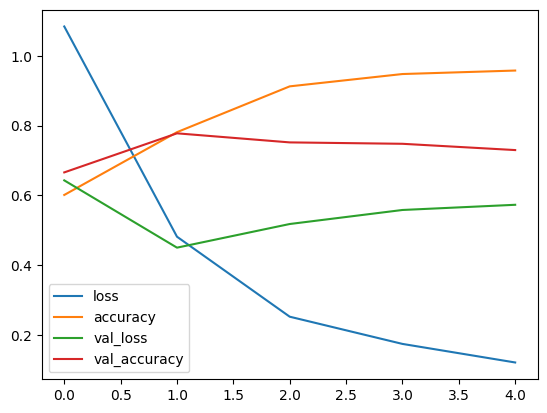

In [35]:
# Plotting the loss curves
import pandas as pd
pd.DataFrame(hist_5.history).plot()

In [41]:
# plot curves seperately
def plot_loss_curves(history):
    """
    Returns seperate loss curves for training and validation
    """
    loss=history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # plot the loss curves
    plt.figure()
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    # plot the accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

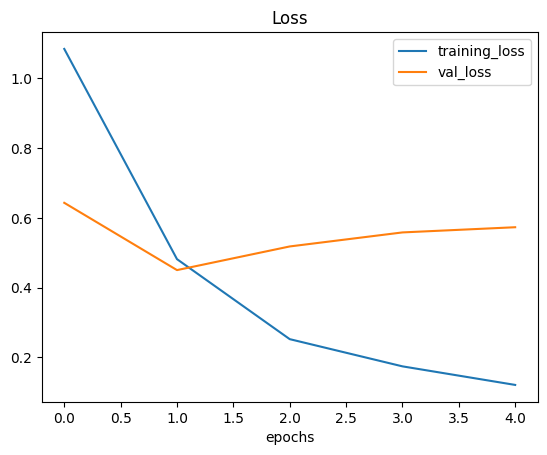

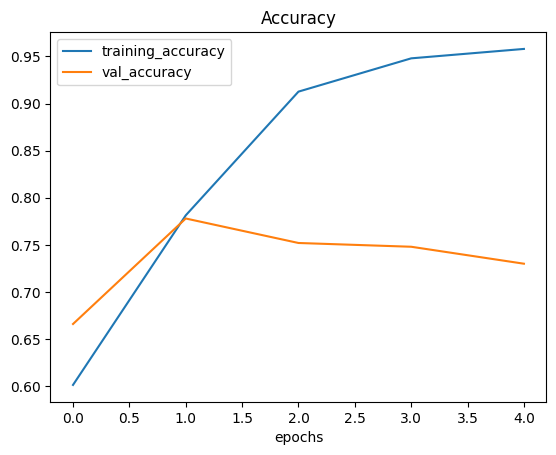

In [42]:
# Check the model's accuracy and loss
plot_loss_curves(hist_5)

**Note**: When a model's validation loss starts to increase. it's likely that the model is overfitting the training data, diminishing the model's ability to generalize to unseen data.

## Making a prediction with our model on custom data

In [43]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

--2024-01-03 20:22:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2024-01-03 20:22:43 (85.3 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

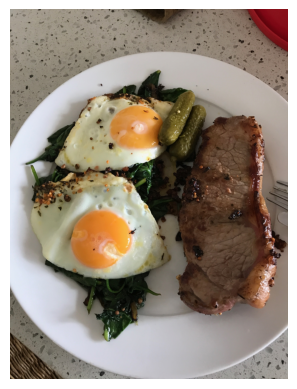

In [44]:
plt.imshow(steak)
plt.axis(False)

In [45]:
# chech the shape of the image
steak.shape

(4032, 3024, 3)

In [46]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [47]:
model_5.predict(steak)

ValueError: ignored

When youtrain a nueral network and you want to make predictions on your custom data, it's important that your data is preprocessed into the same

In [53]:
# Create a helper function to import and resize image to use with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from 'filename', turns it into a tensor and reshapes it to
    (img_shape, img_shape, color_channels)
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize image
    img = tf.image.resize(img, size=(img_shape, img_shape))
    # Rescale the image
    img = img / 225
    return img

In [54]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7227778 , 0.705     , 0.6561111 ],
        [0.7372222 , 0.7161111 , 0.66833335],
        [0.7161111 , 0.6894444 , 0.63611114],
        ...,
        [0.5911111 , 0.05777778, 0.10222222],
        [0.5611111 , 0.04777778, 0.08      ],
        [0.5988889 , 0.08777778, 0.11888889]],

       [[0.75      , 0.7322222 , 0.69222224],
        [0.7238889 , 0.70611113, 0.6527778 ],
        [0.74333334, 0.71666664, 0.66333336],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.60055554, 0.06722222, 0.10722222],
        [0.5827778 , 0.06277778, 0.09833334]],

       [[0.73888886, 0.7211111 , 0.6677778 ],
        [0.72444445, 0.69555557, 0.6433333 ],
        [0.7438889 , 0.71055555, 0.66055554],
        ...,
        [0.6022222 , 0.07333333, 0.09111111],
        [0.5977778 , 0.07777778, 0.11333334],
        [0.5922222 , 0.05888889, 0.09888889]],

       ...,

       [[0.5588889 , 0.48444444, 0.35166666],
        [0.06

In [58]:
pred = model_5.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 19ms/step


The model currently outputs the prediction probability, wecan build a function to visualize the image as well as the model's prediction

In [57]:
# remind ourselves of the class names
class_names

['pizza', 'steak']

In [62]:
# We can index the predicted class by rounding the prediction probability and
# indexing on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [67]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title
    """
    # Import the target image and preprocess it
    image = load_and_prep_image(filename)
    # Make prediction
    pred = model.predict(tf.expand_dims(image, axis=0))
    print(pred)
    # get the predicted class
    pred_class = class_names[int(tf.round(pred))]
    plt.imshow(image)
    plt.title(pred_class)
    plt.axis(False)

1/1 [==============================] - 0s 17ms/step


[[0.9851208]]


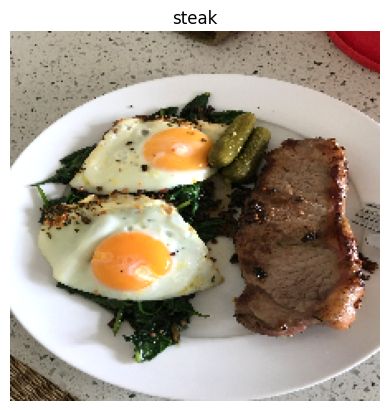

In [68]:
# Test our model on custom image
pred_and_plot(model_5, "03-steak.jpeg")

In [ ]:
model_5.predict()

--2024-01-03 21:15:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2024-01-03 21:15:26 (118 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]

1/1 [==============================] - 0s 18ms/step


[[0.98548317]]


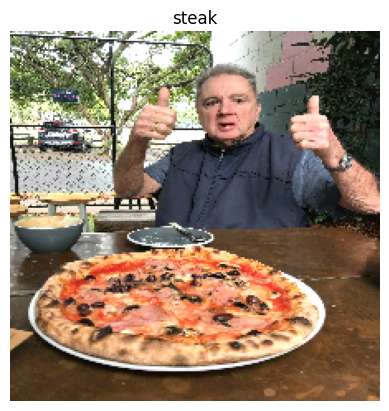

In [69]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_5, "03-pizza-dad.jpeg")

In [71]:
# list1 = [1, 1.23, "123"]
# N = True
# K = 1
# # list1.insert(K, N)
# # list1
# list2 = []
# for i in range(len(list1)):
#     if i == K:
#         list2.append(N)
#         list2.append(list1[i])
#     else:
#         list2.append(list1[i])
# list2

[1, True, 1.23, '123']

# Multiclass Image Classification

## Import and become one with the data


In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
# Unzip data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close

--2024-01-04 23:13:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 2607:f8b0:4023:c0b::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  92.8MB/s    in 6.6s    

2024-01-04 23:13:52 (74.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



<bound method ZipFile.close of <zipfile.ZipFile filename='10_food_classes_all_data.zip' mode='r'>>

In [3]:
import os

# Walk through the classes
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/test'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
There are 10 directori

In [4]:
# set up the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [5]:
# Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
classnames = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(classnames)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape : (512, 512, 3)


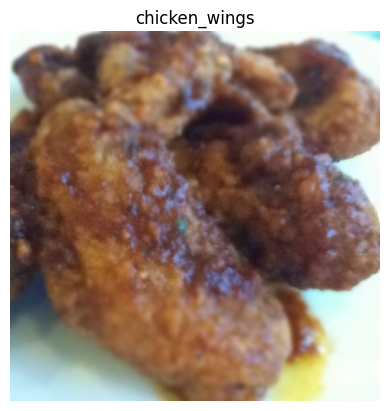

In [6]:
# Visualize a random image
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(classnames))

In [7]:
# Build a better visulizing function
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def view_random_images(target_dir, classnames=classnames):
    plt.figure(figsize=(10,7))
    for i in range(9):
        # Setup the target directory
        target_class = random.choice(classnames)
        target_folder = target_dir + target_class
        # Get a random image
        random_image = random.sample(os.listdir(target_folder), 1)
        img = mpimg.imread(target_folder+'/'+random_image[0])
        # plot image
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.title(target_class)
        plt.axis("off")

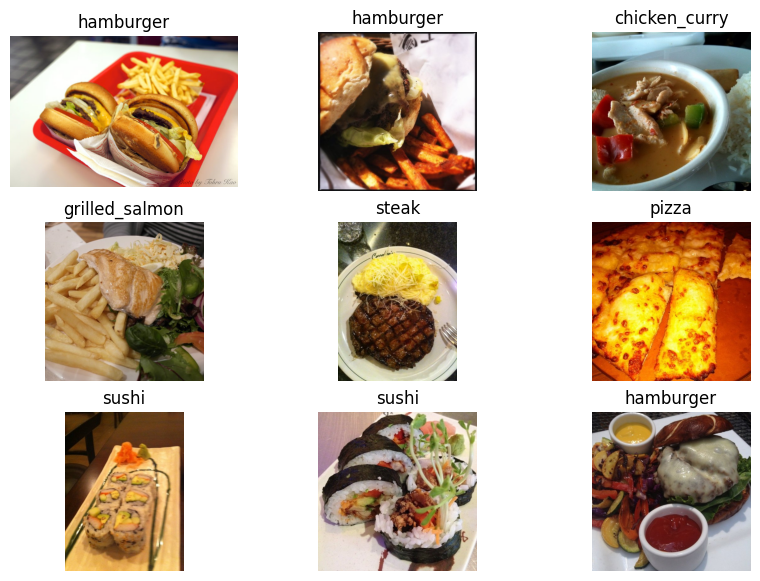

In [8]:
view_random_images(target_dir=train_dir)

## 2. Preprocess the data

In [9]:
import tensorflow as tf

batch_size = 32
img_height = 224
img_width = 224
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    label_mode='categorical',
    seed=42,
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    batch_size=32,
    image_size=(img_height, img_width),
    shuffle=True,
    label_mode='categorical',
    seed=42,
)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [10]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### 3. Create a CNN model

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Rescaling, Flatten, MaxPool2D, Conv2D, MaxPool2D
from keras.optimizers import Adam
# set  random seed
tf.random.set_seed(42)

# create model
model_6 = Sequential([
    Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    Conv2D(filters=32,
           kernel_size=3,
           padding='valid',
           activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=2,
              padding='valid'),
    Conv2D(32, 3, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation='softmax')
])

# compile the model
model_6.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
hist_6 = model_6.fit(train_ds,
                     epochs=10,
                     steps_per_epoch=len(train_ds),
                     validation_data=test_ds,
                     validation_steps=len(test_ds))

Epoch 1/10
235/235 [==============================] - 35s 122ms/step - loss: 2.1199 - accuracy: 0.2344 - val_loss: 1.9474 - val_accuracy: 0.3144
Epoch 2/10
235/235 [==============================] - 19s 81ms/step - loss: 1.8540 - accuracy: 0.3645 - val_loss: 1.8939 - val_accuracy: 0.3312
Epoch 3/10
235/235 [==============================] - 19s 82ms/step - loss: 1.5163 - accuracy: 0.4928 - val_loss: 2.0042 - val_accuracy: 0.3036
Epoch 4/10
235/235 [==============================] - 19s 82ms/step - loss: 0.9437 - accuracy: 0.6940 - val_loss: 2.7851 - val_accuracy: 0.2688
Epoch 5/10
235/235 [==============================] - 19s 82ms/step - loss: 0.4973 - accuracy: 0.8407 - val_loss: 3.5059 - val_accuracy: 0.2504
Epoch 6/10
235/235 [==============================] - 19s 82ms/step - loss: 0.3085 - accuracy: 0.9025 - val_loss: 4.5220 - val_accuracy: 0.2396
Epoch 7/10
235/235 [==============================] - 19s 82ms/step - loss: 0.1521 - accuracy: 0.9532 - val_loss: 6.2013 - val_accuracy

In [13]:
2500 /32

78.125

In [17]:
### Evaluate the model
model_6.evaluate(test_ds)

79/79 [==============================] - 2s 26ms/step - loss: 7.7360 - accuracy: 0.2416


[7.735968589782715, 0.24160000681877136]

In [18]:
# plot loss curves
def plot_loss_curves(history):
    """
    Returns seperate loss curves for training and validation
    """
    loss=history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # plot the loss curves
    plt.figure()
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    # plot the accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

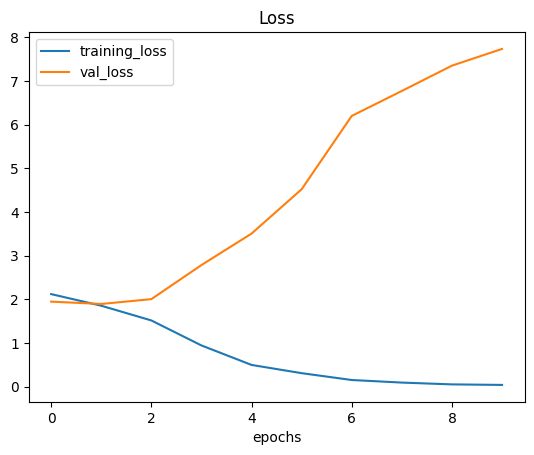

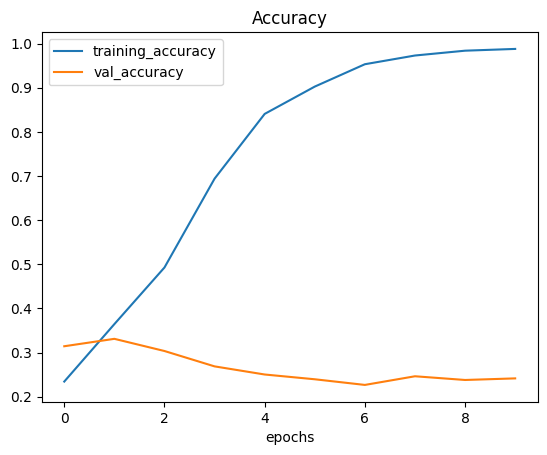

In [19]:
plot_loss_curves(hist_6)

### Adjust model's Hyperparameters to beat overfitting